# Chapter 3 

En este capitulo desarrollare un modelo que permita predicir, los valores de venta de mis datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("e:/piere/Documentos/Portafolio/JMIA/Data/Proccesed/JMIA_Limpia.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Adj Close,Volume
0,2019-04-12,18.950001,25.459999,18.260000,25.459999,9472300
1,2019-04-15,26.940001,39.950001,25.629999,31.910000,12857300
2,2019-04-16,35.330002,43.500000,33.099998,43.040001,12939400


In [4]:
df.shape

(653, 6)

Para hacer nuestro modelo solo utilizaremos como X los valores de Open y Volumen. Ya que los demás, son involucrados después del cierre de las cotizaciones diarias.

In [5]:
x_cols=list(set(list(df.columns))-set(list(["Low","High","Date","Adj Close"])))
y_cols="Adj Close"

In [6]:
X=df[x_cols]
y=df[y_cols]

Utilizaré 3 modelos para comparar mis resultados. Iremos desde una regresión lineal simple hasta una robusta, pasando por una que tenga coeficiente de estandarización como ElasticNet.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=False)

In [9]:
regr=LinearRegression().fit(X_train,y_train)

In [10]:
regr_y_predict=regr.predict(X_test)

In [11]:
atest=regr.score(X_test,y_test)
atrain=regr.score(X_train,y_train)
print(f'El score de mis datos en entramiento es de {atrain:.3f} y mi score de mis datos de test son: {atest:.3f}')

El score de mis datos en entramiento es de 0.986 y mi score de mis datos de test son: 0.979


In [12]:
mean_squared_error(y_test,regr_y_predict)

2.794160347208429

In [13]:
a=X_test.index.tolist()
df_plt=df[df.index.isin(a)]



In [14]:
df_pred=pd.DataFrame(regr_y_predict,index=y_test.index)

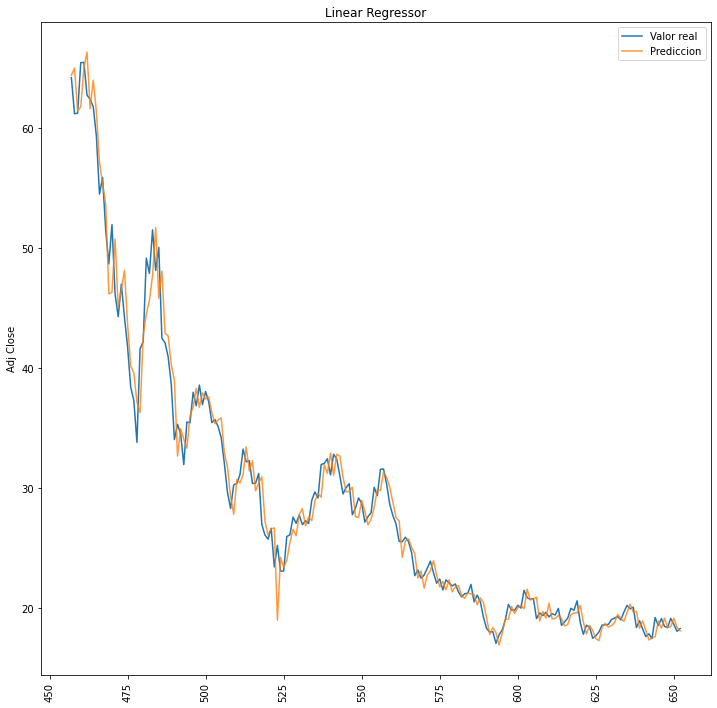

In [42]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test,label="Valor real")
sns.lineplot(data=df_pred,x=df_pred.index,y=regr_y_predict,label="Prediccion",alpha=0.8)
plt.xticks(rotation=90)
plt.title("Linear Regressor")
plt.show()

Las consideraciones generales de mi anterior modelo, con una regresión simple, son que estamos obteniendo un excelente resultado a pesar de ser una regresión simple  sin randomización en  mis datos de entrenamiento y test. Observamos que no estamos obteniendo algún Overfitting a razón de que los resultados de Train y Test son muy semejantes. Cabe recalcar, que este gran resultado se lo podemos atribuir a la correlación prácticamente directa entre mis variables.

# ElasticNet

In [16]:
from sklearn.linear_model import ElasticNet

In [17]:
regr_elastic=ElasticNet(random_state=42).fit(X_train,y_train)

In [44]:
atest=regr_elastic.score(X_test,y_test)
atrain=regr_elastic.score(X_train,y_train)
print(f'El score de mis datos en entramiento es de {atrain:.3f} y mi score de mis datos de test son: {atest:.3f}')

El score de mis datos en entramiento es de 0.986 y mi score de mis datos de test son: 0.979


In [19]:
regr_elatic_y_predict=regr.predict(X_test)

In [20]:
mean_squared_error(y_test,regr_elatic_y_predict)

2.794160347208429

In [21]:
df_pred_elactic=pd.DataFrame(regr_y_predict,index=y_test.index)

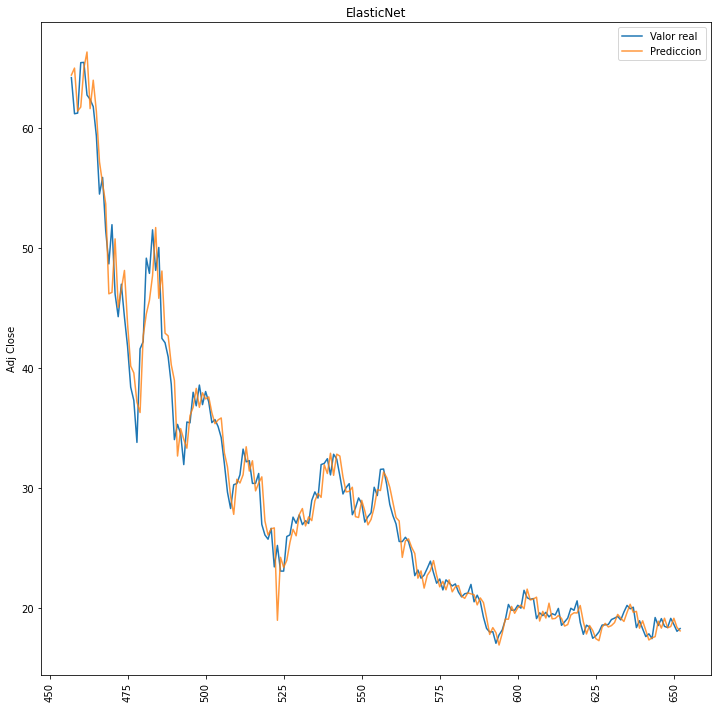

In [41]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test,label="Valor real")
sns.lineplot(data=df_pred_elactic,x=df_pred_elactic.index,y=regr_y_predict,label="Prediccion",alpha=0.8)
plt.xticks(rotation=90)
plt.title("ElasticNet")
plt.show()

Las consideraciones generales de este modelo, como lo es ElasticNet pasan por la regularización de mis features, donde buscamos reducir el fenómeno de overfitting. Sin embargo, en este caso específico no vemos esa variación con respecto a mi regresión lineal simple, por la razón que solamente estoy utilizando dos features que son fuertemente correlacionados con mi target. Cosa que impide que ElasticNet, pueda castigar esos features por falta de más features.

# Huber Regressor 

In [23]:
from sklearn.linear_model import HuberRegressor

In [32]:
regr_huber=HuberRegressor(fit_intercept=False)

In [33]:
regr_huber.fit(X_train,y_train)

HuberRegressor(fit_intercept=False)

In [34]:
y_precit_huber=regr_huber.predict(X_test)

In [43]:
atest=regr_huber.score(X_test,y_test)
atrain=regr_huber.score(X_train,y_train)
print(f'El score de mis datos en entramiento es de {atrain:.3f} y mi score de mis datos de test son: {atest:.3f}')

El score de mis datos en entramiento es de -0.363 y mi score de mis datos de test son: -3.325


In [36]:
mean_squared_error(y_test,y_precit_huber)

577.6104582407745

In [37]:
df_pred_Huber=pd.DataFrame(y_precit_huber,index=y_test.index)

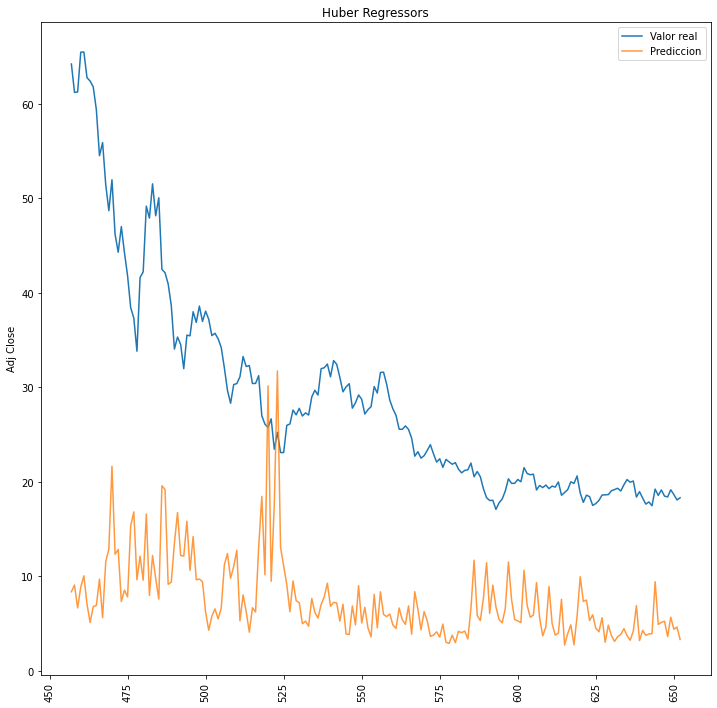

In [40]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test,label="Valor real")
sns.lineplot(data=df_pred_Huber,x=df_pred_Huber.index,y=y_precit_huber,label="Prediccion",alpha=0.8)
plt.xticks(rotation=90)
plt.title("Huber Regressors")
plt.show()

La regresión robusta de Huber Regressor, se caracteriza por penalizar los outliers que tengo en mis datos. Dicho esto, observamos como este modelo tiene un mal score y un mal mean-squared-error. A razón de que, las cotizaciones de precios puede obtener bastantes outliers que representan un dato atípico si no una cotización alta por un factor externo.